<a href="https://colab.research.google.com/github/JLMuehlbauer/MLB_Pitch_Type/blob/main/DataVisualizationExercise_JacksonMuehlbauer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# Importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter

In [74]:
# Mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
# Loading data
filepath = '/content/drive/My Drive/Colab Notebooks/Raw Data/FanGraphs Leaderboard.xlsx'

df = pd.read_excel(filepath)
df.head()

,Season,IP,Pitches,FB%,SL%,CT%,CB%,CH%,SF%,KN%,XX%
0,2002,43269.0,698383,0.644,0.121,NaN,0.112,0.098,0.017,0.008,0.070
1,2003,43335.0,701439,0.638,0.118,NaN,0.100,0.120,0.017,0.006,0.059
2,2004,43394.0,710223,0.626,0.136,0.010,0.091,0.114,0.017,0.006,0.089
3,2005,43232.1,696313,0.619,0.148,0.022,0.084,0.109,0.014,0.005,0.055
4,2006,43258.0,707725,0.611,0.151,0.027,0.088,0.106,0.014,0.003,0.026


# Recreating fivethirtyeight plot
Being a fan of baseball and baseball statistics, this felt like a fun dataset to work on. Here is the original plot from this fivethirtyeight article https://fivethirtyeight.com/features/why-some-mlb-pitchers-are-abandoning-the-fastball/:
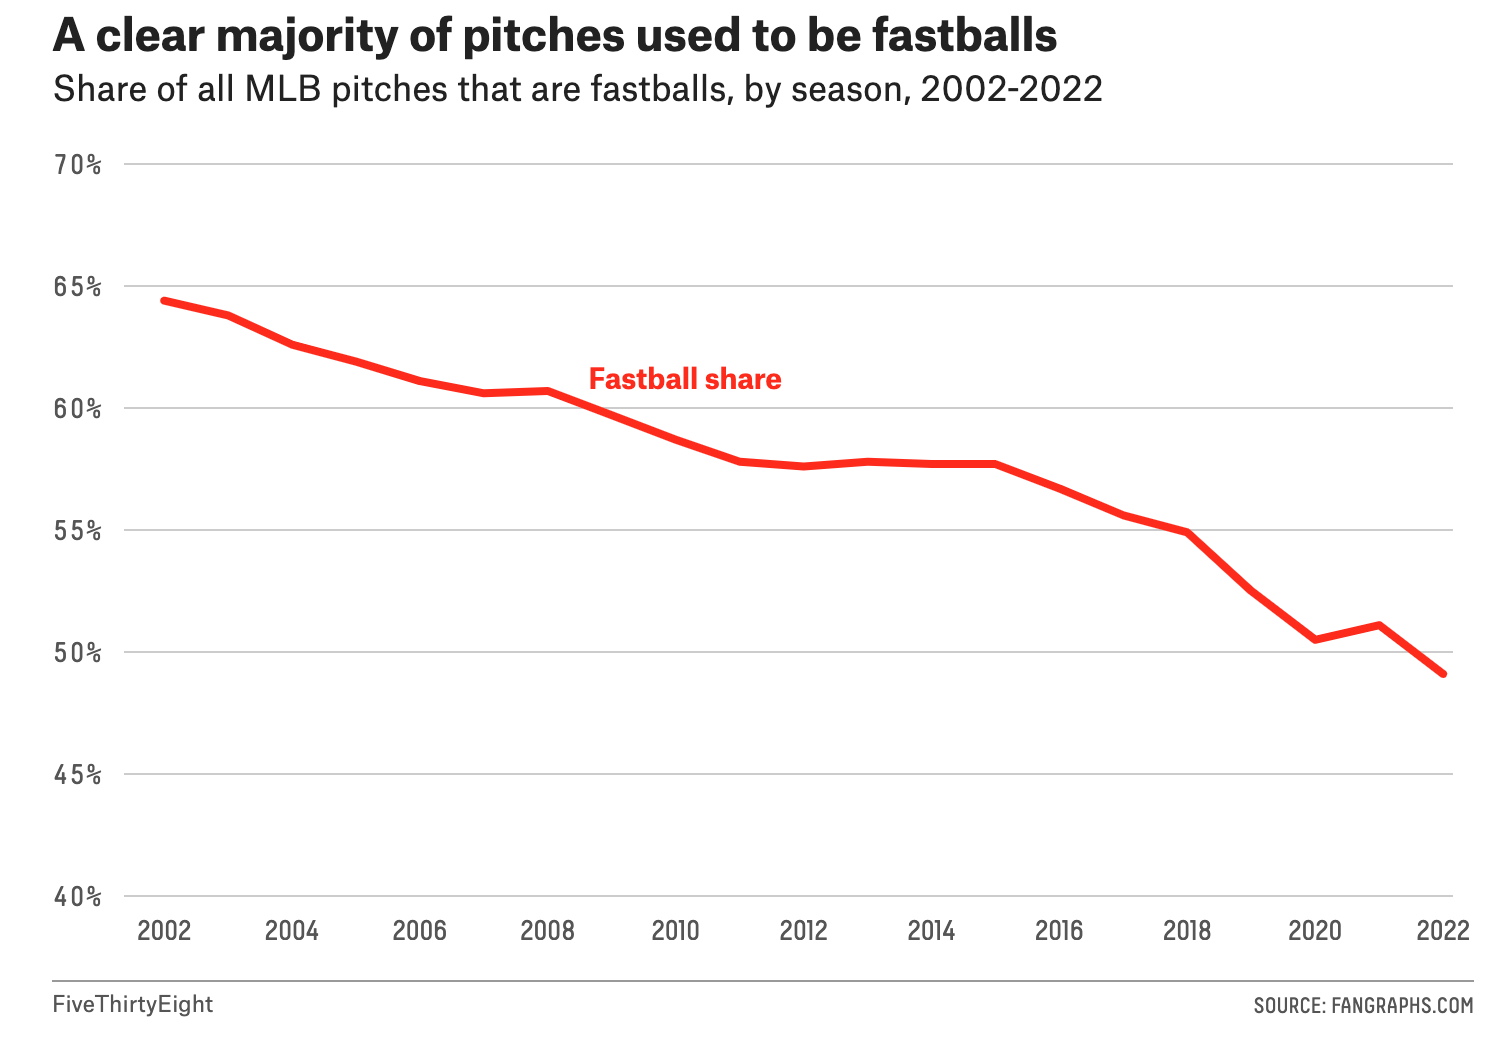

This is a visually pleasing plot and gets the point across that pitchers have been using fewer and fewer fastballs over the last 2 decades. That said, its relatively simple, it should be easy to replicate.

In [76]:
# Making numpy arrays from df
season = df['Season'].values
fb = df['FB%'].values*100

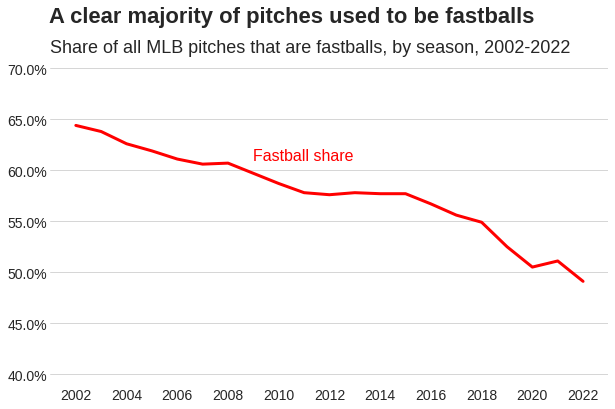

In [86]:
# Recreation
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (10, 6));
ax.plot(season, fb, c = 'r', linewidth = 3);

# Formatting plot
ax.ticklabel_format(useOffset=False);
ax.set_xlim(left = 2001, right = 2023);
ax.set_ylim(top = 71, bottom = 39);
ax.set_xticks(np.arange(min(season), max(season)+1, 2));
ax.set_title('Share of all MLB pitches that are fastballs, by season, 2002-2022', loc = 'left', fontsize = 18)
fig.suptitle('A clear majority of pitches used to be fastballs', fontsize = 22, fontweight = 'bold', x=0.46, y=1)
ax.text(2009, 61, 'Fastball share', c = 'r', fontsize = 16);
ax.tick_params(labelsize = 14)

#Display % next to yticks
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add grid lines
ax.grid(axis = 'y');

# removing the frame that contains the plot
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.spines['bottom'].set_visible(False);
ax.spines['left'].set_visible(False);









Comments:

I think this is pretty close to the look of the fivethirtyeight plot. The key differences is that there is a decimal place on the y-axis and the fonts have not been aligned. 

# New Plot

Key Features
- Information as to which pitches increased in usage as a result of less fastball usage

In [78]:
df.head()

,Season,IP,Pitches,FB%,SL%,CT%,CB%,CH%,SF%,KN%,XX%
0,2002,43269.0,698383,0.644,0.121,NaN,0.112,0.098,0.017,0.008,0.070
1,2003,43335.0,701439,0.638,0.118,NaN,0.100,0.120,0.017,0.006,0.059
2,2004,43394.0,710223,0.626,0.136,0.010,0.091,0.114,0.017,0.006,0.089
3,2005,43232.1,696313,0.619,0.148,0.022,0.084,0.109,0.014,0.005,0.055
4,2006,43258.0,707725,0.611,0.151,0.027,0.088,0.106,0.014,0.003,0.026


I noticed that the cut fastball category has null values. I suspect that this means that they were not tracking this pitch as different from a standard 4-seam fastball until 2004. For the purpose of using these years in calculations, I will fill these cells with 0. 

In [79]:
df.fillna(0, inplace = True)
df.head()

,Season,IP,Pitches,FB%,SL%,CT%,CB%,CH%,SF%,KN%,XX%
0,2002,43269.0,698383,0.644,0.121,0.000,0.112,0.098,0.017,0.008,0.070
1,2003,43335.0,701439,0.638,0.118,0.000,0.100,0.120,0.017,0.006,0.059
2,2004,43394.0,710223,0.626,0.136,0.010,0.091,0.114,0.017,0.006,0.089
3,2005,43232.1,696313,0.619,0.148,0.022,0.084,0.109,0.014,0.005,0.055
4,2006,43258.0,707725,0.611,0.151,0.027,0.088,0.106,0.014,0.003,0.026


In [108]:
# Going to plot this as layers 
fb = df['FB%'].values*100
sl = df['SL%'].values*100 + fb
ct = df['CT%'].values*100 + sl
cb = df['CB%'].values*100 + ct
ch = df['CH%'].values*100 + cb
other = df['SF%'].values*100 + df['KN%'].values*100 + ch


There may be another way to do this but this is easy enough.

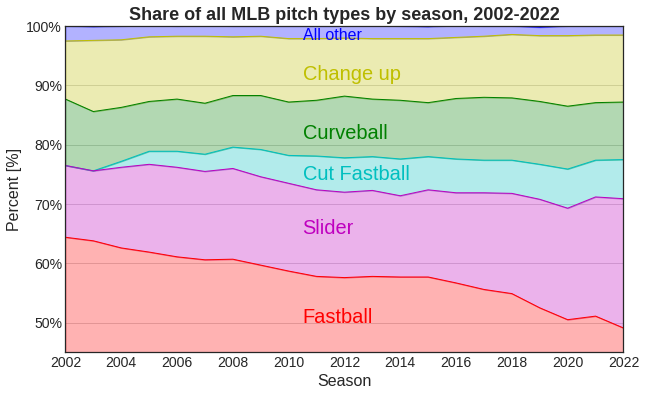

In [105]:
# New plot
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (10, 6));

# Plotting all pitch types
#Other
ax.plot(season, other, c = 'b', linewidth = 1, label = 'All Other');
plt.fill_between(season, other, ch, color = 'b', alpha = 0.3);

#CH
ax.plot(season, ch, c = 'y', linewidth = 1, label = 'Change up');
plt.fill_between(season, ch, cb, color = 'y', alpha = 0.3);

#CB
ax.plot(season, cb, c = 'g', linewidth = 1, label = 'Curveball');
plt.fill_between(season, cb, ct, color = 'g', alpha = 0.3);

#CT
ax.plot(season, ct, c = 'c', linewidth = 1, label = 'Cut fastball');
plt.fill_between(season, ct, sl, color = 'c', alpha = 0.3);

#SL
ax.plot(season, sl, c = 'm', linewidth = 1, label = 'Slider');
plt.fill_between(season, sl, fb, color = 'm', alpha = 0.3);

#FB
ax.plot(season, fb, c = 'r', linewidth = 1, label = 'Fastball');
plt.fill_between(season, fb, color = 'r', alpha = 0.3);

# Plot formatting
ax.set_xlim(left = 2002, right = 2022);
ax.set_ylim(top = 100, bottom = 45);
ax.set_xticks(np.arange(min(season), max(season)+1, 2));
ax.set_title('Share of all MLB pitch types by season, 2002-2022', fontsize = 18, fontweight = 'bold')
ax.tick_params(labelsize = 14)
ax.set_xlabel('Season', fontsize = 16)
ax.set_ylabel('Percent [%]', fontsize = 16)

# Add % symbol on yticks
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add grid lines
ax.grid(axis = 'y');

#Labeling directly on plot with each pitch type
ax.text(2010.5, 50, 'Fastball', c = 'r', fontsize = 20);
ax.text(2010.5, 65, 'Slider', c = 'm', fontsize = 20);
ax.text(2010.5, 74, 'Cut Fastball', c = 'c', fontsize = 20);
ax.text(2010.5, 81, 'Curveball', c = 'g', fontsize = 20);
ax.text(2010.5, 91, 'Change up', c = 'y', fontsize = 20);
ax.text(2010.5, 97.7, 'All other', c = 'b', fontsize = 16);

Observations:
- With the decrease in the fastball usage, there is an increase in slider and cut fastball usage
- It's possible that much of the decrease in the fastball usage is a result of starting to categorize cut fastballs

How does this same plot look when combining cut fastballs with fast balls?

In [111]:
# Redefining fastballs to include cut fastballs
fb2 = df['FB%'].values*100 + df['CT%'].values*100 
sl2 = df['SL%'].values*100 + fb2
cb2 = df['CB%'].values*100 + sl2
ch2 = df['CH%'].values*100 + cb2
other2 = df['SF%'].values*100 + df['KN%'].values*100 + ch2

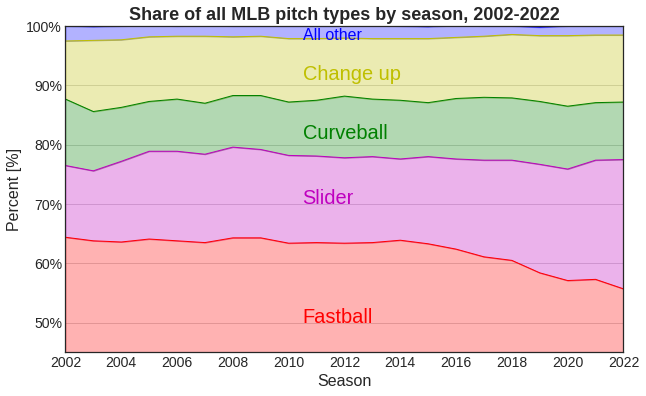

In [112]:
# New plot with new fastball category
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (10, 6));

# Plotting all pitch types
#Other
ax.plot(season, other2, c = 'b', linewidth = 1, label = 'All Other');
plt.fill_between(season, other2, ch2, color = 'b', alpha = 0.3);

#CH
ax.plot(season, ch2, c = 'y', linewidth = 1, label = 'Change up');
plt.fill_between(season, ch2, cb2, color = 'y', alpha = 0.3);

#CB
ax.plot(season, cb2, c = 'g', linewidth = 1, label = 'Curveball');
plt.fill_between(season, cb2, sl2, color = 'g', alpha = 0.3);


#SL
ax.plot(season, sl2, c = 'm', linewidth = 1, label = 'Slider');
plt.fill_between(season, sl2, fb2, color = 'm', alpha = 0.3);

#FB
ax.plot(season, fb2, c = 'r', linewidth = 1, label = 'Fastball');
plt.fill_between(season, fb2, color = 'r', alpha = 0.3);

# Plot formatting
ax.set_xlim(left = 2002, right = 2022);
ax.set_ylim(top = 100, bottom = 45);
ax.set_xticks(np.arange(min(season), max(season)+1, 2));
ax.set_title('Share of all MLB pitch types by season, 2002-2022', fontsize = 18, fontweight = 'bold')
ax.tick_params(labelsize = 14)
ax.set_xlabel('Season', fontsize = 16)
ax.set_ylabel('Percent [%]', fontsize = 16)

# Add % symbol on yticks
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add grid lines
ax.grid(axis = 'y');

#Labeling directly on plot with each pitch type
ax.text(2010.5, 50, 'Fastball', c = 'r', fontsize = 20);
ax.text(2010.5, 70, 'Slider', c = 'm', fontsize = 20);
ax.text(2010.5, 81, 'Curveball', c = 'g', fontsize = 20);
ax.text(2010.5, 91, 'Change up', c = 'y', fontsize = 20);
ax.text(2010.5, 97.7, 'All other', c = 'b', fontsize = 16);

Findings:

After binning cut fastballs with standard fastballs we see that there has only been around a 7-point drop in fastball usage rather than a 15-point drop. It also becomes clear that much of the drop can be attributed to an increase in slider usage. 